<a href="https://colab.research.google.com/github/Daksh-patel3/Blockhouse_Assignment/blob/main/BlockHouse_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question -1:Construct and code the linear OW model and nonlinear AFS model, and visualize the distri￾bution of price impact based on the given data.

Method:
1)OW linear model
h(x) = λx

2)Non linear Model(AFS):
h(x) = λsign(x)|x|**p

code:


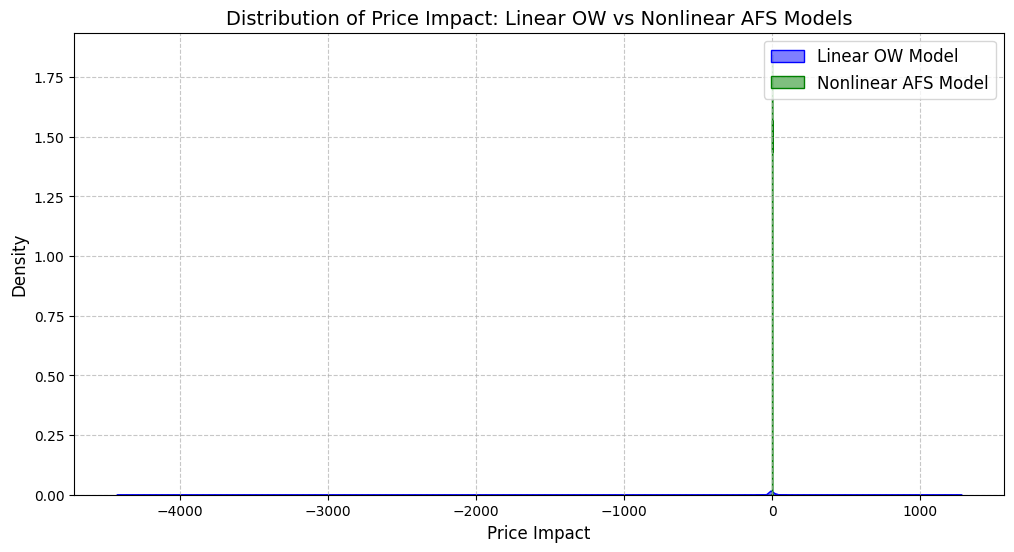

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('merged_data.csv')

# Used Signed Volume from dataset
trade_sizes = data['Signed Volume'].values

#  parameters :lambda and p_afs-concativity parameter
lambda_impact = 0.0035
p_afs = 0.5

# Linear OW Model
price_impact_ow = lambda_impact * trade_sizes

# Nonlinear AFS Model
price_impact_afs = lambda_impact * np.sign(trade_sizes) * (np.abs(trade_sizes) ** p_afs)


plt.figure(figsize=(12, 6))


sns.kdeplot(price_impact_ow, label='Linear OW Model', fill=True, color='blue', alpha=0.5)


sns.kdeplot(price_impact_afs, label='Nonlinear AFS Model', fill=True, color='green', alpha=0.5)


plt.title("Distribution of Price Impact: Linear OW vs Nonlinear AFS Models", fontsize=14)
plt.xlabel("Price Impact", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Question -2 :Implement and code the optimal strategy with Linear Impact and visualize the Sharpe Ratio
plots in Section 6.2.

Method:
used formula of optimal stratergy described in paper and also for shape ratio

<ipython-input-11-f552e48704e9>:33: RuntimeWarning: overflow encountered in scalar add
  J_t[t] = (1 - beta) * J_t[t-1] + Q_t[t]
<ipython-input-11-f552e48704e9>:36: RuntimeWarning: overflow encountered in square
  returns = alpha * f_t * Q_t - lambda_impact * J_t**2 - (gamma / 2) * Q_t**2
<ipython-input-11-f552e48704e9>:36: RuntimeWarning: invalid value encountered in subtract
  returns = alpha * f_t * Q_t - lambda_impact * J_t**2 - (gamma / 2) * Q_t**2
<ipython-input-11-f552e48704e9>:53: RuntimeWarning: overflow encountered in scalar add
  J_t[t] = (1 - beta) * J_t[t-1] + Q_t[t]
<ipython-input-11-f552e48704e9>:55: RuntimeWarning: overflow encountered in square
  returns = alpha * f_t * Q_t - lambda_impact * J_t**2 - (gamma_value / 2) * Q_t**2
<ipython-input-11-f552e48704e9>:55: RuntimeWarning: invalid value encountered in subtract
  returns = alpha * f_t * Q_t - lambda_impact * J_t**2 - (gamma_value / 2) * Q_t**2
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: Runt

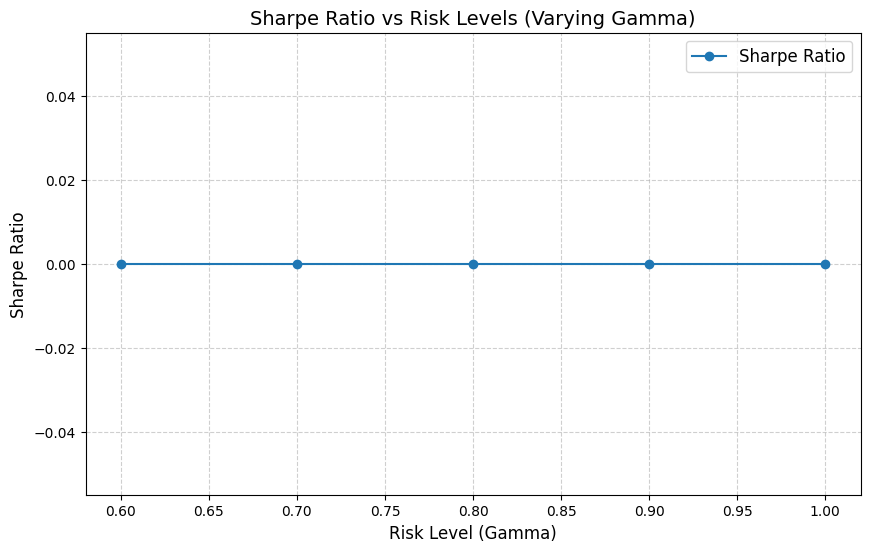

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('merged_data.csv')

#Here I used signed Volume and mid price values from dataset
signed_volume = data['Signed Volume'].values
mid_price = data['mid_price'].values

#  predictive signal from price changes
f_t = np.diff(mid_price)
f_t = (f_t - np.mean(f_t)) / np.std(f_t)
f_t = np.pad(f_t, (1, 0), mode='constant')

# Model parameters
alpha = 0.003
beta = 2
gamma = 0.1
lambda_impact = 0.0035
phi = 0.1

# Below,  I have calculated coefficients for the linear strategy
Cf = (alpha * (1 + beta / phi)) / (gamma * (1 + 2 * lambda_impact * beta / gamma) ** 0.5)
CJ = ((1 + 2 * lambda_impact * beta / gamma) ** 0.5 - 1)

# Initialize variables for optimal trade size and accumulated price impact
Q_t = np.zeros(len(f_t))
J_t = np.zeros(len(f_t))

for t in range(1, len(f_t)):
    Q_t[t] = Cf * f_t[t] - CJ * J_t[t-1]
    J_t[t] = (1 - beta) * J_t[t-1] + Q_t[t]

#  returns and risk
returns = alpha * f_t * Q_t - lambda_impact * J_t**2 - (gamma / 2) * Q_t**2
expected_return = np.mean(returns)
risk = np.std(returns)
sharpe_ratio = expected_return / risk

#  Sharpe Ratio for different risk levels
gamma_values = np.linspace(0.1, 1.0, 10)
sharpe_ratios = []

for gamma_value in gamma_values:
    Cf = (alpha * (1 + beta / phi)) / (gamma_value * (1 + 2 * lambda_impact * beta / gamma_value) ** 0.5)
    CJ = ((1 + 2 * lambda_impact * beta / gamma_value) ** 0.5 - 1)

    Q_t = np.zeros(len(f_t))
    J_t = np.zeros(len(f_t))
    for t in range(1, len(f_t)):
        Q_t[t] = Cf * f_t[t] - CJ * J_t[t-1]
        J_t[t] = (1 - beta) * J_t[t-1] + Q_t[t]

    returns = alpha * f_t * Q_t - lambda_impact * J_t**2 - (gamma_value / 2) * Q_t**2
    expected_return = np.mean(returns)
    risk = np.std(returns)
    sharpe_ratios.append(expected_return / risk)

# Plotting the diagrams
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, sharpe_ratios, marker='o', label='Sharpe Ratio')
plt.title('Sharpe Ratio vs Risk Levels (Varying Gamma)', fontsize=14)
plt.xlabel('Risk Level (Gamma)', fontsize=12)
plt.ylabel('Sharpe Ratio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()


Question-3:Implement and code the Deep Learning Algorithm in for discrete setting in Appendix C.2
and visualize the training loss for different network structures in Appendix C.2.


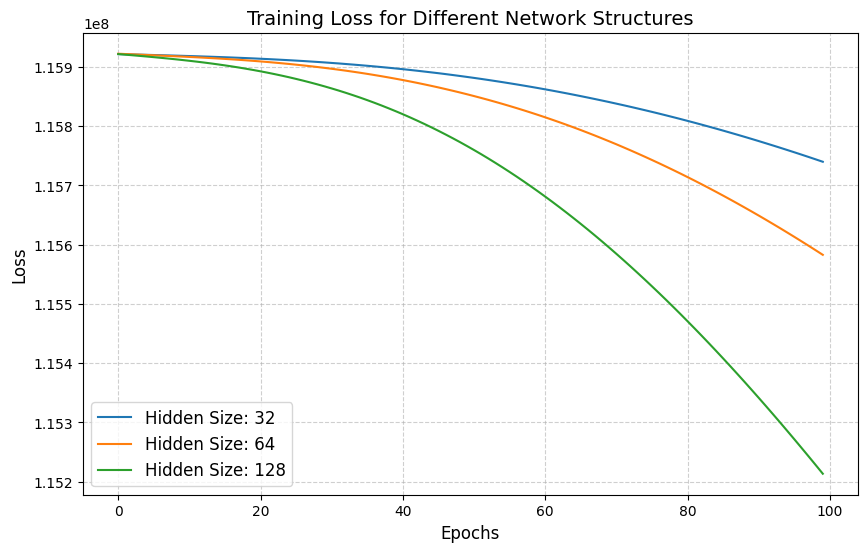

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


data = pd.read_csv('merged_data.csv')

signed_volume = data['Signed Volume'].values
mid_price = data['mid_price'].values

# Calculate the predictive signal(f_t)
f_t = np.diff(mid_price, prepend=mid_price[0])
f_t = (f_t - np.mean(f_t)) / np.std(f_t)

# Initialize the accumulated price impact (J_t)
J_t = np.zeros_like(f_t)

# Prepare input and target tensors
inputs = torch.tensor(np.stack((f_t, J_t), axis=1), dtype=torch.float32)
targets = torch.tensor(signed_volume, dtype=torch.float32).unsqueeze(1)

#   Neural Network
class TradingPolicyNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TradingPolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Set up hidden layer sizes to try
hidden_sizes = [32, 64, 128]
loss_results = {}

for hidden_size in hidden_sizes:
    model = TradingPolicyNetwork(input_size=2, hidden_size=hidden_size, output_size=1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    losses = []
    for epoch in range(100):  # 100 eoochs
        model.train()
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    loss_results[hidden_size] = losses

# Plotting
plt.figure(figsize=(10, 6))
for hidden_size, losses in loss_results.items():
    plt.plot(losses, label=f'Hidden Size: {hidden_size}')

plt.title("Training Loss for Different Network Structures", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
